## Check MOM6 single model on P2L data

Note: There are some issues with the normalization coeff of the single runs. Retraining may be needed to be fixed.

In [3]:
import sys 
sys.path.append('../modules/')

In [4]:
%reload_ext autoreload
%autoreload 2
import evaluation

In [5]:
#model_nc  = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/MOM6_P2L_all_36_36.nc'
data_kind = 'MOM6' 
exp_name  = 'P2L' 
ML_name   = 'single'

In [6]:
eval_dic = {}
Lkeys = ['50', '100', '200', '400']
for L in Lkeys: 
    model_nc  = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/MOM6_P2L_'+L+'_36_36.nc'
    data_zarr = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_'+L+'km.zarr'
    eval_dic[L] = evaluation.full_reader(model_nc, data_zarr, L, data_kind, exp_name, ML_name)

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_50km.zarr
Loaded from saved norm nc for single scale.
Normalized data
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_100km.zarr
Loaded from saved norm nc for single scale.
Normalized data
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_200km.zarr
Loaded from saved norm nc for single scale.
Normalized data
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_400km.zarr
Loaded from saved norm nc for single scale.
Normalized data


In [7]:
eval_dic['50'].eval_ds.norm_factors.Sfnx.values

array(0.65485152)

In [8]:
eval_dic['50'].model_xr.output_norms.values

array([1.103115 , 0.7384286], dtype=float32)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

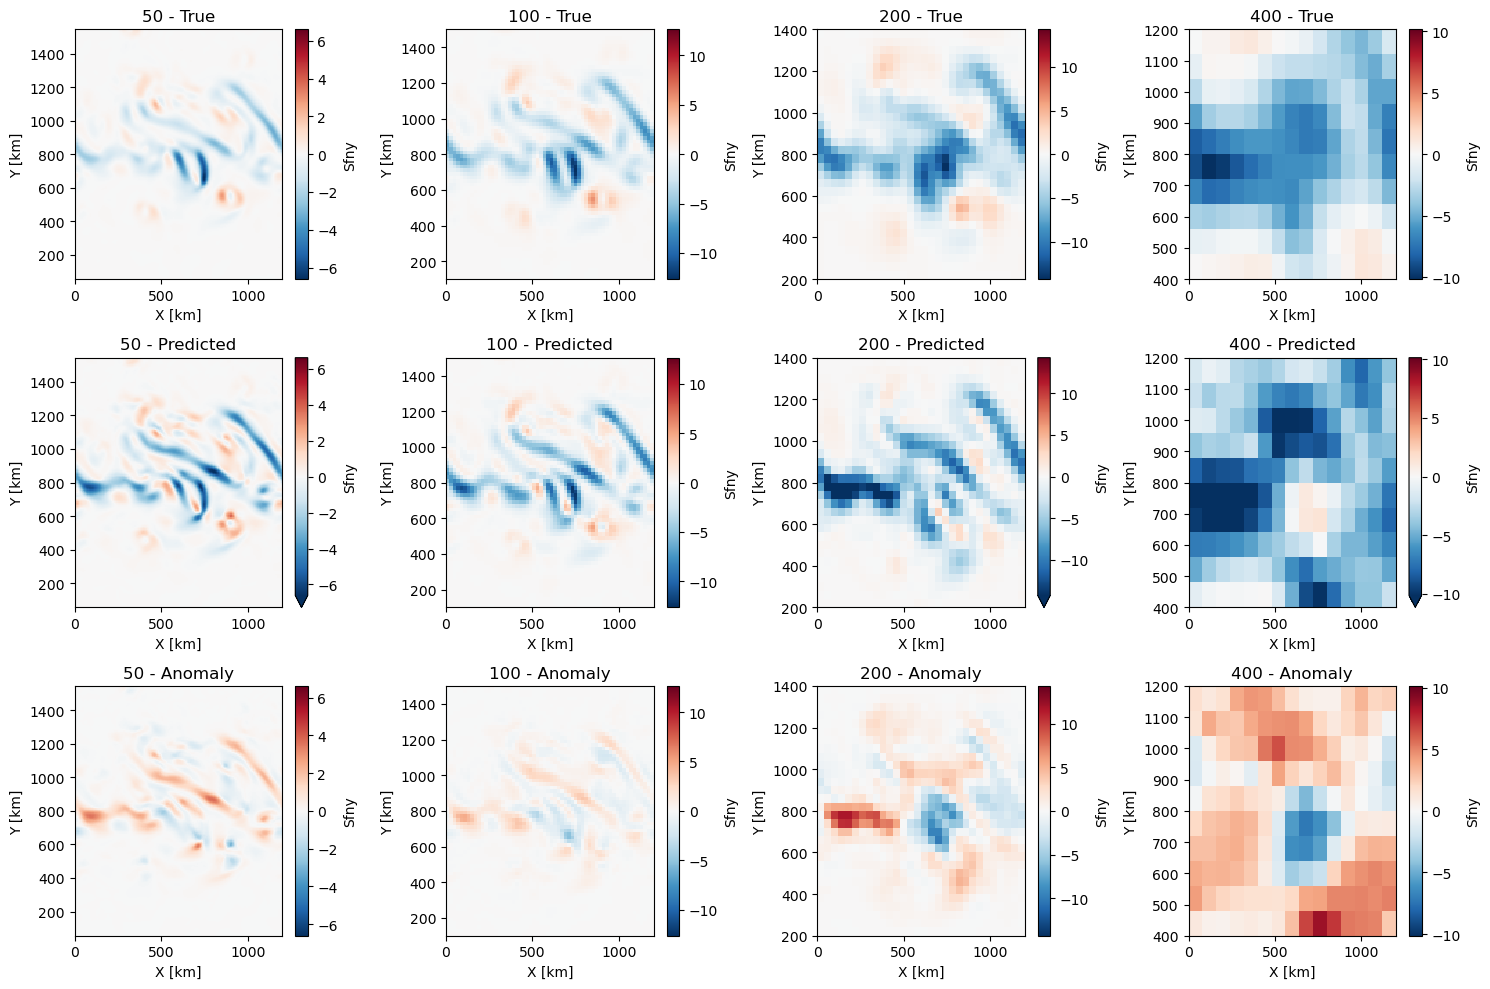

In [9]:
# Create a figure and axis objects
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Iterate through the keys '50km', '100km', '200km', and '400km' and plot each dataset
for i, key in enumerate(['50', '100', '200', '400']):
    values = eval_dic[key]
    ds_true = values.output_ds.Sfny.isel(Time=-1)
    ds_pred = values.output_pred_ds.Sfny.isel(Time=-1)
    ds_anomaly = ds_true - ds_pred

    # Plotting true values
    ds_true.plot(ax=axs[0,i], vmin=ds_true.min().values)
    axs[0,i].set_title(f'{key} - True')
    
    # Plotting predicted values
    ds_pred.plot(ax=axs[1,i], vmin=ds_true.min().values)
    axs[1,i].set_title(f'{key} - Predicted')
    
    # Plotting anomaly values
    ds_anomaly.plot(ax=axs[2,i], vmin=ds_true.min().values)
    axs[2,i].set_title(f'{key} - Anomaly')
    
    # Set title and labels
    for j in range(3):
        axs[j,i].set_xlabel('X [km]')
        axs[j,i].set_ylabel('Y [km]')

    
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
#plt.show()

#plt.savefig('./figures/data_MOM6p2l_ML_MOM6all_panels.png')